In [2]:
import pandas as pd
df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
df.info()
#No null values
#seems like vote average and popularity might give us a correlation
#genre id is something to look at, if we can find the key
#original language might be something to consider as well
#main use of this dataset is the "popularity" column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Text(0, 0.5, 'Popularity')

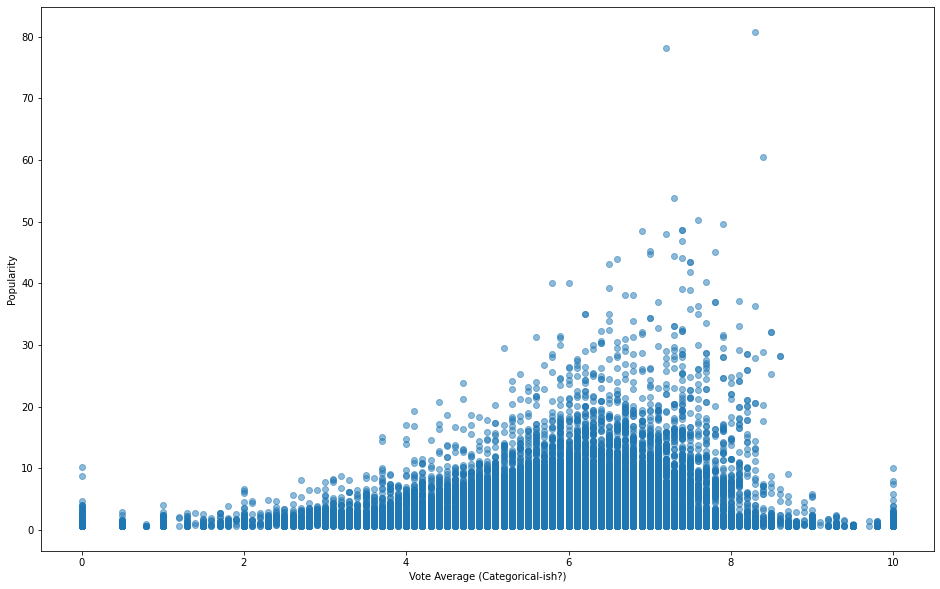

In [20]:
#checking correlation between vote average and popularity
import matplotlib.pyplot as plt

x = df['vote_average']
y = df['popularity']

fig, ax = plt.subplots(figsize=(16,10))

ax.scatter(x, y, alpha=0.5)
ax.set_xlabel('Vote Average (Categorical-ish?)')
ax.set_ylabel('Popularity')

#there's a relatively normal distribution in terms of popularity and vote averages

In [22]:
df.corr(method='pearson')
#high correlation between popularity and vote_count, which is to be expected. Not a high correlation between popularity and 
#vote average

,Unnamed: 0,id,popularity,vote_average,vote_count
Unnamed: 0,1.000000,0.836647,0.028741,0.086375,-0.022948
id,0.836647,1.000000,-0.148720,0.116085,-0.130221
popularity,0.028741,-0.148720,1.000000,0.065273,0.694849
vote_average,0.086375,0.116085,0.065273,1.000000,0.086370
vote_count,-0.022948,-0.130221,0.694849,0.086370,1.000000


In [ ]:
#Next things to test: correlation between popularity and release month/date, correlation between language and popularity